In [117]:
greek_alphabet = {
    u'\u0391': 'Alpha',
    u'\u0392': 'Beta',
    u'\u0393': 'Gamma',
    u'\u0394': 'Delta',
    u'\u0395': 'Epsilon',
    u'\u0396': 'Zeta',
    u'\u0397': 'Eta',
    u'\u0398': 'Theta',
    u'\u0399': 'Iota',
    u'\u039A': 'Kappa',
    u'\u039B': 'Lamda',
    u'\u039C': 'Mu',
    u'\u039D': 'Nu',
    u'\u039E': 'Xi',
    u'\u039F': 'Omicron',
    u'\u03A0': 'Pi',
    u'\u03A1': 'Rho',
    u'\u03A3': 'Sigma',
    u'\u03A4': 'Tau',
    u'\u03A5': 'Upsilon',
    u'\u03A6': 'Phi',
    u'\u03A7': 'Chi',
    u'\u03A8': 'Psi',
    u'\u03A9': 'Omega',
    u'\u03B1': 'alpha',
    u'\u03B2': 'beta',
    u'\u03B3': 'gamma',
    u'\u03B4': 'delta',
    u'\u03B5': 'epsilon',
    u'\u03B6': 'zeta',
    u'\u03B7': 'eta',
    u'\u03B8': 'theta',
    u'\u03B9': 'iota',
    u'\u03BA': 'kappa',
    u'\u03BB': 'lamda',
    u'\u03BC': 'mu',
    u'\u03BD': 'nu',
    u'\u03BE': 'xi',
    u'\u03BF': 'omicron',
    u'\u03C0': 'pi',
    u'\u03C1': 'rho',
    u'\u03C3': 'sigma',
    u'\u03C4': 'tau',
    u'\u03C5': 'upsilon',
    u'\u03C6': 'phi',
    u'\u03C7': 'chi',
    u'\u03C8': 'psi',
    u'\u03C9': 'omega',
}
ga = {v: k for k, v in greek_alphabet.iteritems()}

In [85]:
import numpy as np
import pandas as pd

data = pd.read_csv('data.csv', sep=';', names=['theta', 'N'], skip_blank_lines=True)
N0 = float(data[data['theta'] == 0]['N'])
data['cos'] = map(lambda x: 1- np.cos(np.pi*float(x)/(180)), data['theta'])
data['y'] = map(lambda x: 1/float(x), data['N'])
data.sort_values(by='cos', inplace=True)

Nerr = 4. #погрешность в вычислении номера канала
data['yerr'] = map(lambda x: np.sqrt(Nerr**2/x**4 + Nerr**2/N0**4), data['N'])


In [81]:
data

,theta,N,cos,y,yerr
0,0,835,0.000000,0.001198,0.000012
1,10,812,0.015192,0.001232,0.000013
2,20,744,0.060307,0.001344,0.000014
3,30,701,0.133975,0.001427,0.000015
4,40,650,0.233956,0.001538,0.000017
5,50,574,0.357212,0.001742,0.000020
6,60,500,0.500000,0.002000,0.000025
7,70,482,0.657980,0.002075,0.000027
8,80,418,0.826352,0.002392,0.000035
9,90,368,1.000000,0.002717,0.000045


In [60]:
import scipy.optimize as opt

In [103]:
def func(x, a, b): #прямая которой будем приближать
    return a*x + b

popt, pcov = opt.curve_fit(func, data['cos'], data['y'], sigma=data['yerr'])
perr = np.sqrt(np.diag(pcov))
Aerr, berr = perr/popt
Aerr, berr #относительные погрешности параметров

(0.03137744638609758, 0.012875371104835142)

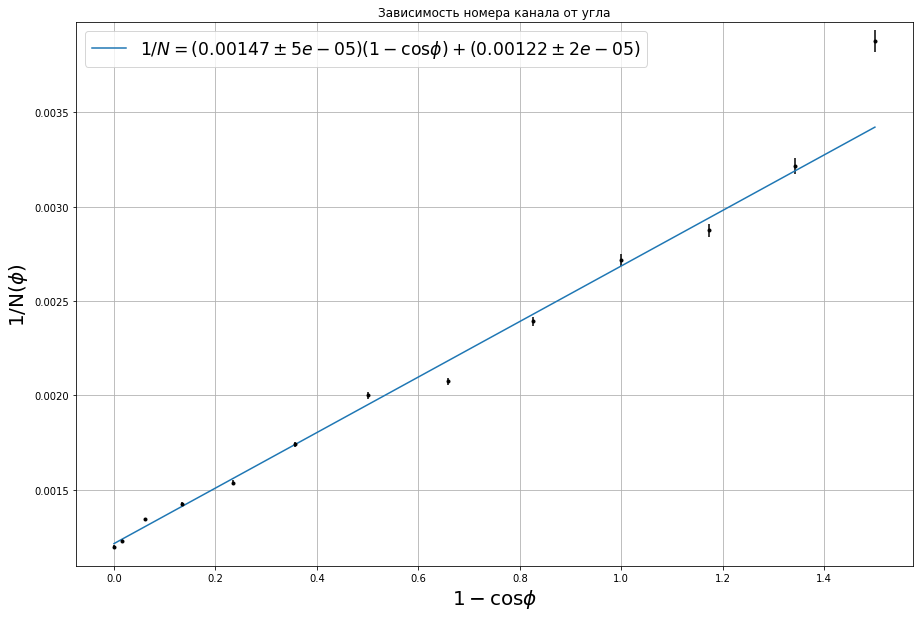

In [104]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(15,10), )
plt.title(u"Зависимость номера канала от угла")
plt.ylabel('1/N($\phi$)', fontsize = 20)
plt.xlabel('$1-\cos\phi$', fontsize = 20)
x = data['cos']
plt.ylim(min(data['y'])-0.0001, max(data['y'])+0.0001)
y = map(lambda x: 1/float(x), data['N'])
plt.errorbar(x, y, yerr = data['yerr'], color = 'black', marker = '.', linestyle = 'None' )
xline = np.linspace(0,1.5)
yline = popt[0]*xline + popt[1]
plt.plot(xline, yline, label='$1/N = ({0}\pm{1})(1-\cos\phi) + ({2}\pm{3})$'.format(round(popt[0],5), round(perr[0],5), round(popt[1],5), round(perr[1],5)))
plt.grid(which='both')
plt.legend(fontsize='xx-large')
plt.show()
fig.savefig('plot.pdf')

In [98]:
N90 = 1/(sum(popt))
N0 = 1/popt[1]
N90, N0
Ey = 661.7

In [124]:
E = Ey*N90/(N0-N90)
print u'Eэксп = ', round(E)

Eэксп =  547.0


In [119]:
N90err = np.sqrt(Aerr**2 + berr**2)
print ga['sigma']+'N(90)/N(90) =', N90err

σN(90)/N(90)= 0.033916357746663364


In [105]:
Eerr = E*np.sqrt(N90err**2 + (N90err*N90 + berr*N0)**2/(N0-N90)**2)

In [125]:
print ga['sigma']+'E =',round(Eerr), ga['sigma']+'E/E =', round(Eerr/E, 4), ga['sigma']+'N(90) =', round(N90err*N90,2), ga['sigma']+'N(0) =', round(berr*N0,2) #числа чтоб вписать в отчет при подсчете погрешности


σE = 34.0 σE/E = 0.0617 σN(90) = 12.63 σN(0) = 10.6
